# IUB Campus Peak Coincident Demand Analysis

## About the Meter Data
We have all the IUB smart meter data for 2019:
- The smart meters record electricity usage at 15-minute intervals
- The data contains a date & time stamp and a numeric value of the electricity used (kWh) over the 15-minute period
    - For reference, the typical refrigerator uses 2.4 kWh per day.
- There is not a 1:1 relationship between buildings and meters.  
- Some meters are "virtual" meters and have a METER_ID prefixed with VE.
- Duke Energy has 6 'main meters'.  IUB has placed these 6 smart meters directly in front of the 6 meters Duke Energy uses to bill the university for it's electric usage.
    - METER_IDS: '4440099', '4440104', '4440105', '4440012', '4440073', '4440177'
    - There is a meter parent child relationship or hierarchy that is not described in the data provided.


## Load the Meter Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data.  This data is considered sensitive and can only be hosted on slashtmp.  It should not be checked into github.  Login to basecamp for instructions on how to download the raw data.

In [2]:
# Read in the data, it is tab seperated.  Note: Google Co-Lab has trouble reading the file, likely due to some type of encoding issue.
df = pd.read_csv("data/IU.txt", sep="\t")

# Convert to datetime and date string into datetime objects.
df.READ_DT = pd.to_datetime(df.READ_DT)
df.READ_DTM = pd.to_datetime(df.READ_DTM)

# Set the index to READ_DTM to allow pandas to treat the dataframe as a timeseries when plotting, etc.
df.set_index('READ_DTM',drop=False,inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12060907 entries, 2019-01-11 18:30:00 to 2019-12-02 21:45:00
Data columns (total 12 columns):
METER_ID          object
CHANNEL_ID        int64
READ_DT           datetime64[ns]
READ_HR           int64
READ_30MIN_INT    int64
READ_15MIN_INT    int64
READ_5MIN_INT     int64
READ_DTM          datetime64[ns]
READ_VALUE        float64
UOM               object
STATUS            int64
READ_VERSION      int64
dtypes: datetime64[ns](2), float64(1), int64(7), object(2)
memory usage: 1.2+ GB


## EDA on the Meter Data

In [42]:
df.head(10)

METER_ID    READ_DT  READ_HR  READ_30MIN_INT  \
READ_DTM                                                           
2019-01-11 18:30:00  4440193 2019-01-11       19               1   
2019-01-11 18:45:00  4440193 2019-01-11       19               2   
2019-01-11 19:00:00  4440193 2019-01-11       19               2   
2019-01-11 19:15:00  4440193 2019-01-11       20               1   
2019-01-11 19:30:00  4440193 2019-01-11       20               1   
2019-01-11 19:45:00  4440193 2019-01-11       20               2   
2019-01-11 20:00:00  4440193 2019-01-11       20               2   
2019-01-11 20:15:00  4440193 2019-01-11       21               1   
2019-01-11 20:30:00  4440193 2019-01-11       21               1   
2019-01-11 20:45:00  4440193 2019-01-11       21               2   

                     READ_15MIN_INT            READ_DTM  READ_VALUE  
READ_DTM                                                             
2019-01-11 18:30:00               2 2019-01-11 18:30:00   49.781986  
2019-01-11 18:45:00               3 2019-01-11 18:45:00   47.690464  
2019-01-11 19:00:00               4 2019-01-11 19:00:00   47.265308  
2019-01-11 19:15:00               1 2019-01-11 19:15:00   46.851425  
2019-01-11 19:30:00               2 2019-01-11 19:30:00   47.333904  
2019-01-11 19:45:00               3 2019-01-11 19:45:00   46.899647  
2019-01-11 20:00:00               4 2019-01-11 20:00:00   47.331848  
2019-01-11 20:15:00               1 2019-01-11 20:15:00   47.097729  
2019-01-11 20:30:00               2 2019-01-11 20:30:00   47.953922  
2019-01-11 20:45:00               3 2019-01-11 20:45:00   46.433487

Drop columns that are not needed

In [5]:
df = df.drop(['CHANNEL_ID','READ_5MIN_INT', 'UOM','STATUS','READ_VERSION'], axis=1)

In [6]:
df.describe(include='all')

METER_ID              READ_DT       READ_HR  READ_30MIN_INT  \
count   12060907             12060907  1.206091e+07    1.206091e+07   
unique       375                  366           NaN             NaN   
top     VE BL551  2019-03-30 00:00:00           NaN             NaN   
freq       35136                34727           NaN             NaN   
first        NaN  2019-01-01 00:00:00           NaN             NaN   
last         NaN  2020-01-01 00:00:00           NaN             NaN   
mean         NaN                  NaN  1.249821e+01    1.497016e+00   
std          NaN                  NaN  6.919782e+00    5.036926e-01   
min          NaN                  NaN  1.000000e+00    0.000000e+00   
25%          NaN                  NaN  7.000000e+00    1.000000e+00   
50%          NaN                  NaN  1.200000e+01    1.000000e+00   
75%          NaN                  NaN  1.800000e+01    2.000000e+00   
max          NaN                  NaN  2.400000e+01    2.000000e+00   

        READ_15MIN_INT             READ_DTM    READ_VALUE  
count     1.206091e+07             12060907  1.206091e+07  
unique             NaN                35132           NaN  
top                NaN  2019-03-10 03:00:00           NaN  
freq               NaN                  713           NaN  
first              NaN  2019-01-01 00:15:00           NaN  
last               NaN  2020-01-02 00:00:00           NaN  
mean      2.494769e+00                  NaN  1.514131e+02  
std       1.121996e+00                  NaN  3.236825e+04  
min       0.000000e+00                  NaN -4.947788e+07  
25%       1.000000e+00                  NaN  5.000000e+00  
50%       2.000000e+00                  NaN  1.680000e+01  
75%       3.000000e+00                  NaN  4.960000e+01  
max       4.000000e+00                  NaN  4.947847e+07

## Create a dataframe that only includes our 6 mirrored Duke energy meters.
IDs - 4440099, 4440104, 4440105, 4440012, 4440073, 4440177

In [7]:
# DUKE IDs
duke_ids = ['4440099', '4440104', '4440105', '4440012', '4440073', '4440177']
# Dataframe of DUKE meter IDs
df_duke = df[df.iloc[:, 0].isin(duke_ids)]

In [43]:
df_duke.head(10)

METER_ID    READ_DT  READ_HR  READ_30MIN_INT  \
READ_DTM                                                           
2019-01-11 00:15:00  4440012 2019-01-11        1               1   
2019-01-11 00:30:00  4440012 2019-01-11        1               1   
2019-01-11 00:45:00  4440012 2019-01-11        1               2   
2019-01-11 01:00:00  4440012 2019-01-11        1               2   
2019-01-11 01:15:00  4440012 2019-01-11        2               1   
2019-01-11 01:30:00  4440012 2019-01-11        2               1   
2019-01-11 01:45:00  4440012 2019-01-11        2               2   
2019-01-11 02:00:00  4440012 2019-01-11        2               2   
2019-01-11 02:15:00  4440012 2019-01-11        3               1   
2019-01-11 02:30:00  4440012 2019-01-11        3               1   

                     READ_15MIN_INT            READ_DTM  READ_VALUE  HOUR  \
READ_DTM                                                                    
2019-01-11 00:15:00               1 2019-01-11 00:15:00   16.704023     0   
2019-01-11 00:30:00               2 2019-01-11 00:30:00   17.094500     0   
2019-01-11 00:45:00               3 2019-01-11 00:45:00   16.955341     0   
2019-01-11 01:00:00               4 2019-01-11 01:00:00   16.662277     1   
2019-01-11 01:15:00               1 2019-01-11 01:15:00   17.186705     1   
2019-01-11 01:30:00               2 2019-01-11 01:30:00   17.204861     1   
2019-01-11 01:45:00               3 2019-01-11 01:45:00   16.937099     1   
2019-01-11 02:00:00               4 2019-01-11 02:00:00   17.042007     2   
2019-01-11 02:15:00               1 2019-01-11 02:15:00   17.190836     2   
2019-01-11 02:30:00               2 2019-01-11 02:30:00   17.346058     2   

                     MONTH        DATE  
READ_DTM                                
2019-01-11 00:15:00      1  2019-01-11  
2019-01-11 00:30:00      1  2019-01-11  
2019-01-11 00:45:00      1  2019-01-11  
2019-01-11 01:00:00      1  2019-01-11  
2019-01-11 01:15:00      1  2019-01-11  
2019-01-11 01:30:00      1  2019-01-11  
2019-01-11 01:45:00      1  2019-01-11  
2019-01-11 02:00:00      1  2019-01-11  
2019-01-11 02:15:00      1  2019-01-11  
2019-01-11 02:30:00      1  2019-01-11

### Unfortunatly, one of our 6 mirrored meters, 4440104, was failing for 8 months.

In [9]:
df_duke['METER_ID'].value_counts()

4440012    35117
4440073    35116
4440177    35116
4440105    35112
4440099    34952
4440104    10001
Name: METER_ID, dtype: int64

### Are there any reads for 0 kWh?
Is this a problem?

In [10]:
# check for any 0 reads
zero_read_by_meter = df_duke[df_duke.READ_VALUE == 0].groupby('METER_ID')
zero_read_by_meter.READ_VALUE.count()

METER_ID
4440073    3676
4440099      17
4440105       5
Name: READ_VALUE, dtype: int64

### Max kWh reading per duke meter

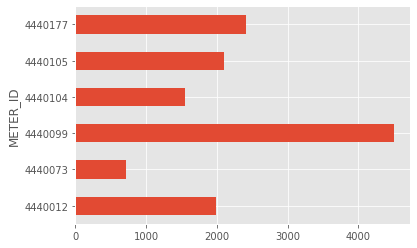

In [11]:
plt.style.use('ggplot')
df_duke.groupby('METER_ID')['READ_VALUE'].max().plot.barh()

## Plot the kWh usage for the 6 Meters

In [12]:
#Suresh Kuruvilla 03/23/2020
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df_group = df_duke.groupby(['METER_ID'])
ncols=1
nrows = int(np.ceil(df_group.ngroups/ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,12))

for (key, ax) in zip(df_group.groups.keys(), axes.flatten()):
    ax.plot(df_group.get_group(key).sort_index().READ_VALUE)
    ax.set_title("Meter Id: %s" % key)
fig.tight_layout()
plt.show()

Notice that for MeterID 4440104 we are missing rows starting after 2019-04-15.  This could mean that we are intermidently missing rows for other time periods as well.  Should we create new rows for those that are missing with NA values for the kWh?

### Handle Faulty Meter Data

In [13]:
# This is where we would plug in Adam's code to impute values for missing data.

# Additionally, the current thinking is that we can move forward with the data we know is "good" 
# as it shouldn't change modeling code or visualization code dramatically.

### More EDA

In [14]:
df_duke['HOUR'] = df_duke['READ_DTM'].dt.hour
df_duke['MONTH'] = df_duke['READ_DTM'].dt.month
df_duke['DATE'] = df_duke['READ_DTM'].dt.date

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [15]:
df_duke.groupby(['MONTH'])['READ_VALUE'].max()

MONTH
1     4009.909912
2     4504.577637
3     3334.824219
4     3555.539551
5     3412.424316
6     3470.648193
7     3379.581299
8     3579.385986
9     3717.685303
10    3687.974121
11    3125.865234
12    2171.711914
Name: READ_VALUE, dtype: float64

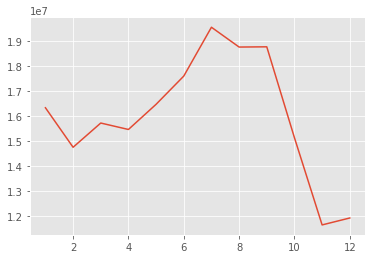

In [16]:

plt.plot(df_duke.groupby(['MONTH'])['READ_VALUE'].sum())

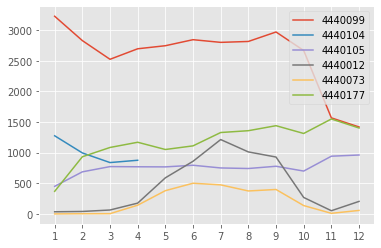

In [17]:
for i in duke_ids:
    plt.plot(df_duke[df_duke.iloc[:, 0] == i].groupby(['MONTH'])['READ_VALUE'].mean(), label='%s' %i)
    
plt.legend(loc=0)
plt.xticks(df_duke['MONTH'].unique())
plt.show()

In [18]:
plt.plot(df_duke.groupby(['DATE'])['READ_VALUE'].median())

In [19]:
df_duke.groupby(['METER_ID', 'MONTH', 'DATE', 'HOUR'])['READ_VALUE'].sum()

METER_ID  MONTH  DATE        HOUR
4440012   1      2019-01-01  0         52.136189
                             1         68.368015
                             2         68.013933
                             3         67.298300
                             4         67.296881
                                        ...     
4440177   12     2019-12-31  19      5427.729004
                             20      5405.585571
                             21      5344.279785
                             22      5312.571045
                             23      5292.466919
Name: READ_VALUE, Length: 46361, dtype: float64

In [20]:
df_duke[(df_duke['READ_DTM'].dt.date == pd.to_datetime('2019-01-01')) & (df_duke.HOUR == 0)]

METER_ID    READ_DT  READ_HR  READ_30MIN_INT  \
READ_DTM                                                           
2019-01-01 00:15:00  4440099 2019-01-01        1               1   
2019-01-01 00:30:00  4440099 2019-01-01        1               1   
2019-01-01 00:45:00  4440099 2019-01-01        1               2   
2019-01-01 00:15:00  4440104 2019-01-01        1               1   
2019-01-01 00:30:00  4440104 2019-01-01        1               1   
2019-01-01 00:45:00  4440104 2019-01-01        1               2   
2019-01-01 00:15:00  4440105 2019-01-01        1               1   
2019-01-01 00:30:00  4440105 2019-01-01        1               1   
2019-01-01 00:45:00  4440105 2019-01-01        1               2   
2019-01-01 00:15:00  4440012 2019-01-01        1               1   
2019-01-01 00:30:00  4440012 2019-01-01        1               1   
2019-01-01 00:45:00  4440012 2019-01-01        1               2   
2019-01-01 00:15:00  4440177 2019-01-01        1               1   
2019-01-01 00:30:00  4440177 2019-01-01        1               1   
2019-01-01 00:45:00  4440177 2019-01-01        1               2   
2019-01-01 00:15:00  4440073 2019-01-01        1               1   
2019-01-01 00:30:00  4440073 2019-01-01        1               1   
2019-01-01 00:45:00  4440073 2019-01-01        1               2   

                     READ_15MIN_INT            READ_DTM   READ_VALUE  HOUR  \
READ_DTM                                                                     
2019-01-01 00:15:00               1 2019-01-01 00:15:00  2894.860840     0   
2019-01-01 00:30:00               2 2019-01-01 00:30:00  2888.389160     0   
2019-01-01 00:45:00               3 2019-01-01 00:45:00  2885.343750     0   
2019-01-01 00:15:00               1 2019-01-01 00:15:00  1059.262573     0   
2019-01-01 00:30:00               2 2019-01-01 00:30:00  1056.900635     0   
2019-01-01 00:45:00               3 2019-01-01 00:45:00  1060.344604     0   
2019-01-01 00:15:00               1 2019-01-01 00:15:00   390.834778     0   
2019-01-01 00:30:00               2 2019-01-01 00:30:00   397.691437     0   
2019-01-01 00:45:00               3 2019-01-01 00:45:00   402.332794     0   
2019-01-01 00:15:00               1 2019-01-01 00:15:00    17.532255     0   
2019-01-01 00:30:00               2 2019-01-01 00:30:00    17.296881     0   
2019-01-01 00:45:00               3 2019-01-01 00:45:00    17.307053     0   
2019-01-01 00:15:00               1 2019-01-01 00:15:00   246.069977     0   
2019-01-01 00:30:00               2 2019-01-01 00:30:00   241.719467     0   
2019-01-01 00:45:00               3 2019-01-01 00:45:00   241.548355     0   
2019-01-01 00:15:00               1 2019-01-01 00:15:00     0.000000     0   
2019-01-01 00:30:00               2 2019-01-01 00:30:00     0.000000     0   
2019-01-01 00:45:00               3 2019-01-01 00:45:00     0.000000     0   

                     MONTH        DATE  
READ_DTM                                
2019-01-01 00:15:00      1  2019-01-01  
2019-01-01 00:30:00      1  2019-01-01  
2019-01-01 00:45:00      1  2019-01-01  
2019-01-01 00:15:00      1  2019-01-01  
2019-01-01 00:30:00      1  2019-01-01  
2019-01-01 00:45:00      1  2019-01-01  
2019-01-01 00:15:00      1  2019-01-01  
2019-01-01 00:30:00      1  2019-01-01  
2019-01-01 00:45:00      1  2019-01-01  
2019-01-01 00:15:00      1  2019-01-01  
2019-01-01 00:30:00      1  2019-01-01  
2019-01-01 00:45:00      1  2019-01-01  
2019-01-01 00:15:00      1  2019-01-01  
2019-01-01 00:30:00      1  2019-01-01  
2019-01-01 00:45:00      1  2019-01-01  
2019-01-01 00:15:00      1  2019-01-01  
2019-01-01 00:30:00      1  2019-01-01  
2019-01-01 00:45:00      1  2019-01-01

In [21]:
df_duke.loc[df_duke['MONTH'] == 1, ['HOUR','DATE', 'READ_VALUE']].groupby(['DATE', 'HOUR'])['READ_VALUE'].sum().unstack(fill_value=0)

HOUR                  0             1             2             3   \
DATE                                                                 
2019-01-01  13817.434559  18361.958210  17808.278948  17650.321356   
2019-01-02  18550.959267  18360.846689  18025.303181  18178.040478   
2019-01-03  19364.081566  19251.543118  19079.100254  19031.626873   
2019-01-04  19387.943956  19312.804304  19190.931664  19047.298567   
2019-01-05  19178.711491  19103.149153  18432.170191  18336.735588   
2019-01-06  19171.287130  18912.194462  18633.547022  18460.709747   
2019-01-07  19761.552408  19486.606581  19083.201374  19001.758535   
2019-01-08  21990.396240  21550.415131  21198.616852  20767.961945   
2019-01-09  19385.511946  19255.577026  19070.202627  19025.852682   
2019-01-10  20113.609035  19791.593391  19698.450426  19638.622635   
2019-01-11  20309.106142  20198.099340  19730.771393  19594.292685   
2019-01-12  19662.281097  19295.914473  19072.123400  18872.608053   
2019-01-13  19474.418446  19258.066834  19188.079144  18974.505625   
2019-01-14  20447.546535  20105.776529  19514.973021  19277.292284   
2019-01-15  20744.380814  20041.942049  19540.450495  19304.772337   
2019-01-16  20717.612688  20019.649006  19628.073187  19341.372837   
2019-01-17  20661.319611  19958.098429  19627.525311  19577.340546   
2019-01-18  20065.779980  19773.849339  19506.498869  19573.088953   
2019-01-19  19504.242853  19190.377737  19076.187727  19085.342785   
2019-01-20  20022.594717  19913.909977  19702.024027  19334.006010   
2019-01-21  20366.058823  19880.508722  19696.731718  19461.470577   
2019-01-22  20590.422132  20119.012476  19668.824957  19593.182936   
2019-01-23  20359.670506  19904.681480  19415.529465  19295.442730   
2019-01-24  20703.917633  20215.313587  19666.691896  19655.824936   
2019-01-25  20843.698051  20555.164824  20155.830162  20006.006849   
2019-01-26  20398.703880  20030.488260  19719.520388  19512.542366   
2019-01-27  20190.808908  19734.887783  19532.410124  19324.268091   
2019-01-28  20720.185841  20166.402660  19819.190338  19656.348026   
2019-01-29  21142.294352  20682.892839  20126.412706  19868.284136   
2019-01-30  21378.810383  21156.809217  20717.764791  20306.771231   
2019-01-31  21494.145102  21025.327059  20718.475695  20500.357576   
2020-01-01  14351.386950  14271.792000  14174.824510  14115.268777   
2020-01-02   3599.335634      0.000000      0.000000      0.000000   

HOUR                  4             5             6             7   \
DATE                                                                 
2019-01-01  17650.036230  17729.969650  17940.256662  18293.502567   
2019-01-02  18181.503380  18182.072142  18594.482464  19160.201813   
2019-01-03  18653.676889  18576.140924  18824.209753  19654.405712   
2019-01-04  18854.861296  18667.475124  18834.350863  19365.211010   
2019-01-05  18374.913330  18334.254093  18525.587616  18808.391998   
2019-01-06  18369.259619  18377.961462  18624.499105  18886.407223   
2019-01-07  18880.208206  18895.535818  19295.245476  20345.290169   
2019-01-08  20552.311279  20600.390839  20908.091064  21833.297424   
2019-01-09  19087.366543  19027.424782  19507.239382  20426.934320   
2019-01-10  19439.829109  19412.306334  19697.528400  20597.956999   
2019-01-11  19435.887074  19355.321041  19467.576963  20536.797781   
2019-01-12  18804.793390  18973.168400  19140.376682  19409.965746   
2019-01-13  18880.209349  18838.576237  18797.969902  18955.467886   
2019-01-14  19104.464682  19216.149172  19796.250954  21305.776884   
2019-01-15  19162.470520  19176.900394  19523.544601  20561.213564   
2019-01-16  19254.226862  19294.600456  19543.712479  20731.368641   
2019-01-17  19385.561804  19318.297369  19569.968927  20521.825195   
2019-01-18  19419.418716  19310.275951  19635.940418  20382.149166   
2019-01-19  19095.268713  19036.169086  19256.650866  19419.894104   
2019-01-20  19352.276743  19258.372128  19497.089962  19850.603939   
2019-01-2

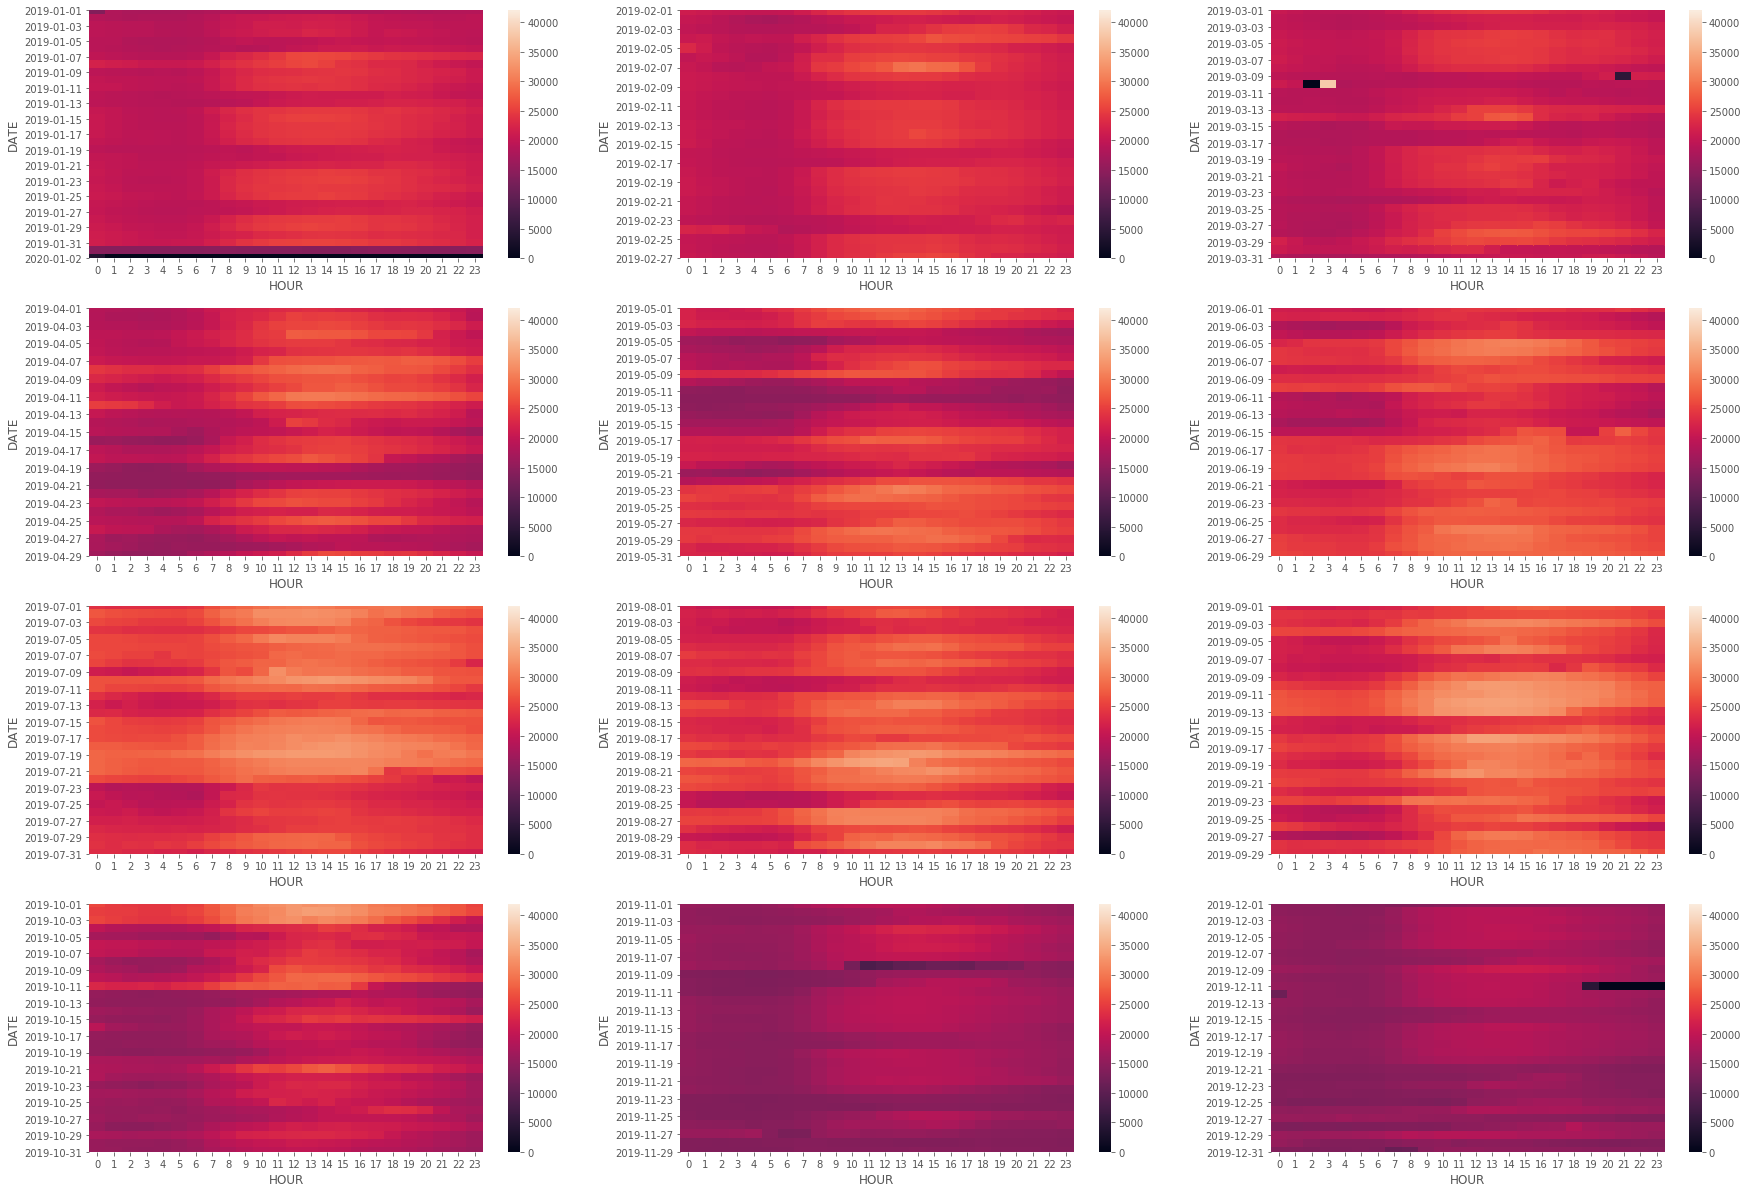

In [22]:
# Hetamaps by Date and Hour over the year for all 6 IDs 
import seaborn as sns
# fig, ax = plt.subplots(4, 3)
fig = plt.figure(figsize=(30,21))
for i in df_duke['MONTH'].unique():
    ax = fig.add_subplot(4, 3, i)
    ax = sns.heatmap(df_duke.loc[df_duke['MONTH'] == i, ['HOUR','DATE', 'READ_VALUE']].groupby(['DATE', 'HOUR'])['READ_VALUE'].sum().unstack(fill_value=0), vmin=0, vmax=42000)

In [23]:
df_duke.loc[df_duke['MONTH'] == 1, ['HOUR','DATE', 'READ_VALUE']].groupby(['DATE', 'HOUR'])['READ_VALUE'].sum()

DATE        HOUR
2019-01-01  0       13817.434559
            1       18361.958210
            2       17808.278948
            3       17650.321356
            4       17650.036230
                        ...     
2020-01-01  20      14413.239656
            21      14364.890768
            22      14397.127516
            23      14474.952809
2020-01-02  0        3599.335634
Name: READ_VALUE, Length: 769, dtype: float64

In [24]:
df_duke.loc[df_duke['MONTH'] == 7,:].groupby(['DATE', 'HOUR'])['READ_VALUE'].sum()

DATE        HOUR
2019-07-01  0       23910.964661
            1       23459.545471
            2       23541.506378
            3       23516.981873
            4       23589.134155
                        ...     
2019-07-31  19      23082.856232
            20      22674.836029
            21      22400.296844
            22      21782.823837
            23      21525.233799
Name: READ_VALUE, Length: 744, dtype: float64

In [25]:
# Heatmap by Date and Hour for all 6 IDs in the month of July (Peak Mean Value in the year)
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(df_duke.loc[df_duke['MONTH'] == 7, ['HOUR','DATE', 'READ_VALUE']].groupby(['DATE', 'HOUR'])['READ_VALUE'].sum().unstack(fill_value=0), vmin=0, vmax=42000, cmap="YlGnBu")

# 2019 Bloomington, IN Weather Data
_Weather Data Provided by Visual Crossing_


## About the Data

This data came from free version of the weather service, [Visual Crossing](https://www.visualcrossing.com/).

The weather data is recorded hourly.

## Attribution Required
Attribution for all Visual Crossing Weather Data usage is required at the Free licensing level. Any application or service which incorporates data obtained from the Visual Crossing Weather Data Server must prominently display the message **"Weather Data Provided by Visual Crossing"** in a legible manner near the data or any information derived from Visual Crossing weather data. This message should include a clickable link to https://www.visualcrossing.com/weather-data.


# Add WEATHER DATA

In [26]:
w_df = pd.read_csv("data/weather_2019_hourly.csv", sep=",")
w_df.columns = w_df.columns.str.replace(" ","_").str.lower()
w_df.head()

location                                            address  \
0  IU Bloomington  107 S Indiana Ave, Bloomington, IN 47405, Unit...   
1  IU Bloomington  107 S Indiana Ave, Bloomington, IN 47405, Unit...   
2  IU Bloomington  107 S Indiana Ave, Bloomington, IN 47405, Unit...   
3  IU Bloomington  107 S Indiana Ave, Bloomington, IN 47405, Unit...   
4  IU Bloomington  107 S Indiana Ave, Bloomington, IN 47405, Unit...   

                                    resolved_address            date_time  \
0  107 S Indiana Ave, Bloomington, IN 47405, Unit...  01/01/2019 00:00:00   
1  107 S Indiana Ave, Bloomington, IN 47405, Unit...  01/01/2019 01:00:00   
2  107 S Indiana Ave, Bloomington, IN 47405, Unit...  01/01/2019 02:00:00   
3  107 S Indiana Ave, Bloomington, IN 47405, Unit...  01/01/2019 03:00:00   
4  107 S Indiana Ave, Bloomington, IN 47405, Unit...  01/01/2019 04:00:00   

   maximum_temperature  minimum_temperature  temperature  wind_chill  \
0                 44.9                 44.9         44.9        37.8   
1                 44.0                 44.0         44.0        37.3   
2                 43.1                 43.1         43.1        37.4   
3                 42.2                 42.2         42.2        36.7   
4                 41.1                 41.1         41.1        35.4   

   heat_index  precipitation  snow_depth  wind_speed  wind_gust  cloud_cover  \
0         NaN            NaN         NaN        16.1       32.2         92.9   
1         NaN            NaN         NaN        13.9        NaN         92.9   
2         NaN            NaN         NaN        10.3        NaN         92.9   
3         NaN            NaN         NaN         9.2        NaN         92.9   
4         NaN            NaN         NaN         9.2        NaN         92.9   

   relative_humidity conditions  \
0              79.47   Overcast   
1              82.24   Overcast   
2              88.16   Overcast   
3              88.20   Overcast   
4              91.81   Overcast   

                               contributing_stations  
0  MONROE COUNTY AIRPORT, (Id=72437503893,5.4mi, ...  
1  MONROE COUNTY AIRPORT, (Id=72437503893,5.4mi, ...  
2  MONROE COUNTY AIRPORT, (Id=72437503893,5.4mi, ...  
3  MONROE COUNTY AIRPORT, (Id=72437503893,5.4mi, ...  
4  MONROE COUNTY AIRPORT, (Id=72437503893,5.4mi, ...

In [27]:
print(w_df.shape, w_df.dtypes)

(8737, 17) location                  object
address                   object
resolved_address          object
date_time                 object
maximum_temperature      float64
minimum_temperature      float64
temperature              float64
wind_chill               float64
heat_index               float64
precipitation            float64
snow_depth               float64
wind_speed               float64
wind_gust                float64
cloud_cover              float64
relative_humidity        float64
conditions                object
contributing_stations     object
dtype: object


In [28]:
w_df.date_time = pd.to_datetime(w_df.date_time)

In [29]:
w_df['HOUR'] = w_df['date_time'].dt.hour
w_df['DATE'] = w_df['date_time'].dt.date
w_df.head()

location                                            address  \
0  IU Bloomington  107 S Indiana Ave, Bloomington, IN 47405, Unit...   
1  IU Bloomington  107 S Indiana Ave, Bloomington, IN 47405, Unit...   
2  IU Bloomington  107 S Indiana Ave, Bloomington, IN 47405, Unit...   
3  IU Bloomington  107 S Indiana Ave, Bloomington, IN 47405, Unit...   
4  IU Bloomington  107 S Indiana Ave, Bloomington, IN 47405, Unit...   

                                    resolved_address           date_time  \
0  107 S Indiana Ave, Bloomington, IN 47405, Unit... 2019-01-01 00:00:00   
1  107 S Indiana Ave, Bloomington, IN 47405, Unit... 2019-01-01 01:00:00   
2  107 S Indiana Ave, Bloomington, IN 47405, Unit... 2019-01-01 02:00:00   
3  107 S Indiana Ave, Bloomington, IN 47405, Unit... 2019-01-01 03:00:00   
4  107 S Indiana Ave, Bloomington, IN 47405, Unit... 2019-01-01 04:00:00   

   maximum_temperature  minimum_temperature  temperature  wind_chill  \
0                 44.9                 44.9         44.9        37.8   
1                 44.0                 44.0         44.0        37.3   
2                 43.1                 43.1         43.1        37.4   
3                 42.2                 42.2         42.2        36.7   
4                 41.1                 41.1         41.1        35.4   

   heat_index  precipitation  snow_depth  wind_speed  wind_gust  cloud_cover  \
0         NaN            NaN         NaN        16.1       32.2         92.9   
1         NaN            NaN         NaN        13.9        NaN         92.9   
2         NaN            NaN         NaN        10.3        NaN         92.9   
3         NaN            NaN         NaN         9.2        NaN         92.9   
4         NaN            NaN         NaN         9.2        NaN         92.9   

   relative_humidity conditions  \
0              79.47   Overcast   
1              82.24   Overcast   
2              88.16   Overcast   
3              88.20   Overcast   
4              91.81   Overcast   

                               contributing_stations  HOUR        DATE  
0  MONROE COUNTY AIRPORT, (Id=72437503893,5.4mi, ...     0  2019-01-01  
1  MONROE COUNTY AIRPORT, (Id=72437503893,5.4mi, ...     1  2019-01-01  
2  MONROE COUNTY AIRPORT, (Id=72437503893,5.4mi, ...     2  2019-01-01  
3  MONROE COUNTY AIRPORT, (Id=72437503893,5.4mi, ...     3  2019-01-01  
4  MONROE COUNTY AIRPORT, (Id=72437503893,5.4mi, ...     4  2019-01-01

In [30]:
w_df.shape

(8737, 19)

In [31]:
w_df.isnull().sum()

location                    0
address                     0
resolved_address            0
date_time                   0
maximum_temperature         2
minimum_temperature         2
temperature                 2
wind_chill               5975
heat_index               8007
precipitation            8457
snow_depth               8737
wind_speed               1840
wind_gust                8441
cloud_cover              4144
relative_humidity         286
conditions                  0
contributing_stations       0
HOUR                        0
DATE                        0
dtype: int64

In [32]:
df_duke.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185414 entries, 2019-01-11 00:15:00 to 2019-12-20 00:00:00
Data columns (total 10 columns):
METER_ID          185414 non-null object
READ_DT           185414 non-null datetime64[ns]
READ_HR           185414 non-null int64
READ_30MIN_INT    185414 non-null int64
READ_15MIN_INT    185414 non-null int64
READ_DTM          185414 non-null datetime64[ns]
READ_VALUE        185414 non-null float64
HOUR              185414 non-null int64
MONTH             185414 non-null int64
DATE              185414 non-null object
dtypes: datetime64[ns](2), float64(1), int64(5), object(2)
memory usage: 15.6+ MB


### Duke Dataframe merged with Weather Data

In [33]:
df_merge = pd.merge(df_duke, w_df,  how='left', left_on=['DATE','HOUR'], right_on = ['DATE','HOUR'])

In [34]:
df_merge = df_merge.drop(['snow_depth', 'location', 'address', 'resolved_address', 'heat_index', 'wind_gust',  'cloud_cover'], axis=1)

In [35]:
df_merge.describe()

READ_HR  READ_30MIN_INT  READ_15MIN_INT     READ_VALUE  \
count  185462.000000   185462.000000   185462.000000  185462.000000   
mean       12.490160        1.499995        2.499984    1035.660357   
std         6.922211        0.500001        1.118042     914.598060   
min         1.000000        1.000000        1.000000       0.000000   
25%         6.000000        1.000000        1.000000     343.942390   
50%        12.000000        1.000000        2.000000     842.737549   
75%        18.000000        2.000000        3.000000    1343.549377   
max        24.000000        2.000000        4.000000    4504.577637   

                HOUR          MONTH  maximum_temperature  minimum_temperature  \
count  185462.000000  185462.000000        184469.000000        184469.000000   
mean       11.490920       6.274725            53.521336            53.521336   
std         6.921554       3.499597            19.662735            19.662735   
min         0.000000       1.000000            -7.700000            -7.700000   
25%         5.000000       3.000000            37.200000            37.200000   
50%        11.000000       6.000000            53.900000            53.900000   
75%        17.000000       9.000000            70.200000            70.200000   
max        23.000000      12.000000            92.800000            92.800000   

         temperature    wind_chill  precipitation     wind_speed  \
count  184469.000000  61265.000000    5904.000000  145929.000000   
mean       53.521336     28.688729       0.159688       8.000906   
std        19.662735     12.510912       0.133830       4.020300   
min        -7.700000    -30.000000       0.100000       0.100000   
25%        37.200000     22.100000       0.100000       4.900000   
50%        53.900000     30.000000       0.100000       7.000000   
75%        70.200000     38.300000       0.200000      10.300000   
max        92.800000     49.300000       1.300000      40.300000   

       relative_humidity  
count      177681.000000  
mean           75.384307  
std            17.731896  
min            23.260000  
25%            62.670000  
50%            78.780000  
75%            89.930000  
max           100.000000

In [36]:
df_merge.sample(10)

METER_ID    READ_DT  READ_HR  READ_30MIN_INT  READ_15MIN_INT  \
21071   4440105 2019-02-06       12               2               4   
90373   4440177 2019-05-31       12               2               3   
139100  4440177 2019-09-16        6               2               4   
121007  4440105 2019-07-31       11               1               2   
89810   4440177 2019-05-30        7               1               2   
65940   4440012 2019-05-22       14               2               4   
3736    4440105 2019-01-08       17               2               3   
76862   4440073 2019-06-29       14               1               2   
72979   4440099 2019-05-16       24               2               3   
24062   4440105 2019-02-10       16               2               3   

                  READ_DTM   READ_VALUE  HOUR  MONTH        DATE  \
21071  2019-02-06 12:00:00   459.971771    12      2  2019-02-06   
90373  2019-05-31 11:45:00  1064.393555    11      5  2019-05-31   
139100 2019-09-16 06:00:00  1330.803345     6      9  2019-09-16   
121007 2019-07-31 10:30:00   762.612122    10      7  2019-07-31   
89810  2019-05-30 06:30:00  1018.365662     6      5  2019-05-30   
65940  2019-05-22 14:00:00   880.048218    14      5  2019-05-22   
3736   2019-01-08 16:45:00   478.944550    16      1  2019-01-08   
76862  2019-06-29 13:30:00   682.820251    13      6  2019-06-29   
72979  2019-05-16 23:45:00  2681.336914    23      5  2019-05-16   
24062  2019-02-10 15:45:00   820.745789    15      2  2019-02-10   

                 date_time  maximum_temperature  minimum_temperature  \
21071  2019-02-06 12:00:00                 53.0                 53.0   
90373  2019-05-31 11:00:00                 72.9                 72.9   
139100 2019-09-16 06:00:00                 70.4                 70.4   
121007 2019-07-31 10:00:00                 71.8                 71.8   
89810  2019-05-30 06:00:00                 64.0                 64.0   
65940  2019-05-22 14:00:00                 69.1                 69.1   
3736   2019-01-08 16:00:00                 48.0                 48.0   
76862  2019-06-29 13:00:00                 88.0                 88.0   
72979  2019-05-16 23:00:00                 66.0                 66.0   
24062  2019-02-10 15:00:00                 31.0                 31.0   

        temperature  wind_chill  precipitation  wind_speed  relative_humidity  \
21071          53.0         NaN            NaN         4.7              96.50   
90373          72.9         NaN            NaN         7.9              64.40   
139100         70.4         NaN            NaN         NaN              80.44   
121007         71.8         NaN            NaN        10.2              61.38   
89810          64.0         NaN            NaN         4.7              92.98   
65940          69.1         NaN            NaN         8.1              89.63   
3736           48.0        41.0            NaN        19.7              60.48   
76862          88.0         NaN            NaN         7.0              58.70   
72979          66.0         NaN            NaN         9.2              99.78   
24062          31.0        21.9            NaN        11.2              90.26   

              conditions                              contributing_stations  
21071           Overcast  MONROE COUNTY AIRPORT, (Id=72437503893,5.4mi, ...  
90373   Partially cloudy  MONROE COUNTY AIRPORT, (Id=72437503893,5.4mi, ...  
139100          Overcast  MONROE COUNTY AIRPORT, (Id=72437503893,5.4mi, ...  
121007             Clear  MONROE COUNTY AIRPORT, (Id=72437503893,5.4mi, ...  
89810           Overcast  MONROE COUNTY AIRPORT, (Id=72437503893,5.4mi, ...  
65940           Overcast  MONROE COUNTY AIRPORT, (Id=72437503893,5.4mi, ...  
3736            Overcast  MONROE COUNTY AIRPORT, (Id=72437503893,5.4mi, ...  
76862   Partially cloudy  MONROE COUNTY AIRPORT, (Id=72437503893,5.4mi, ...  
72979              Clear  MONROE COUNTY AIRPORT, (Id=72437503893,5.4mi, ...  
24062      

### Check to see if we lost any rows after the inner join
You can see that we did lose a handful of rows to the inner join.  We should understand why this occurred.

In [37]:
print(df_merge.shape, df_merge['METER_ID'].value_counts())

(185462, 20) 4440012    35125
4440073    35124
4440177    35124
4440105    35120
4440099    34960
4440104    10009
Name: METER_ID, dtype: int64


In [38]:
print(df_duke.shape, df_duke['METER_ID'].value_counts())

(185414, 10) 4440012    35117
4440073    35116
4440177    35116
4440105    35112
4440099    34952
4440104    10001
Name: METER_ID, dtype: int64


## Add additional features
- Day of the Week Flags
- Weekend Flags
- Football / Basketball / Concert Event Flags
- Add Billing Period
- Add Peak Flag (leading up to peak flags?)
- Tempature Bins ?

Benchmarking - what is expected normal usage.

Feature Selection.

Association Mining.

Patterns from the timeseries that can also map to the association.

## Add Academic Period Variables

In [44]:
df_merge['academic_period'] = 'Break'
df_merge['academic_period'] = np.where((df_merge.READ_DT >= '2019-01-07') & (df_merge.READ_DT <= '2019-05-03'),'Spring 2019',df_merge.academic_period)
df_merge['academic_period'] = np.where((df_merge.READ_DT >= '2019-05-07') & (df_merge.READ_DT <= '2019-07-26'),'Summer 2019',df_merge.academic_period)
df_merge['academic_period'] = np.where((df_merge.READ_DT >= '2019-08-26') & (df_merge.READ_DT <= '2019-12-20'),'Fall 2019',df_merge.academic_period)

# TO DO: Add spring break, fall break, thanksgiving periods as students are likely not on campus in mass at that time.
# Future: Add "online classes only" for 2020 data.

In [40]:
df_merge.sample(5)

METER_ID    READ_DT  READ_HR  READ_30MIN_INT  READ_15MIN_INT  \
39779   4440105 2019-03-02       15               2               4   
29044   4440073 2019-02-19        8               2               4   
8702    4440012 2019-01-18        6               1               2   
152066  4440073 2019-10-31       18               1               2   
139340  4440099 2019-09-12       14               1               1   

                  READ_DTM   READ_VALUE  HOUR  MONTH        DATE  ...  \
39779  2019-03-02 15:00:00   813.812256    15      3  2019-03-02  ...   
29044  2019-02-19 08:00:00     6.002106     8      2  2019-02-19  ...   
8702   2019-01-18 05:30:00    16.709581     5      1  2019-01-18  ...   
152066 2019-10-31 17:30:00     3.759372    17     10  2019-10-31  ...   
139340 2019-09-12 13:15:00  3683.538818    13      9  2019-09-12  ...   

       maximum_temperature  minimum_temperature  temperature  wind_chill  \
39779                 39.0                 39.0         39.0        32.2   
29044                 25.7                 25.7         25.7        19.0   
8702                  32.2                 32.2         32.2        29.0   
152066                34.0                 34.0         34.0        22.1   
139340                87.1                 87.1         87.1         NaN   

        precipitation  wind_speed  relative_humidity  conditions  \
39779             NaN        10.3              66.99    Overcast   
29044             NaN         5.7              71.38    Overcast   
8702              NaN         3.4              91.35    Overcast   
152066            NaN        22.0              74.91    Overcast   
139340            NaN         7.9              58.75       Clear   

                                    contributing_stations academic_period  
39779   MONROE COUNTY AIRPORT, (Id=72437503893,5.4mi, ...     Spring 2019  
29044   MONROE COUNTY AIRPORT, (Id=72437503893,5.4mi, ...     Spring 2019  
8702    MONROE COUNTY AIRPORT, (Id=72437503893,5.4mi, ...     Spring 2019  
152066  MONROE COUNTY AIRPORT, (Id=72437503893,5.4mi, ...       Fall 2019  
139340  MONROE COUNTY AIRPORT, (Id=72437503893,5.4mi, ...       Fall 2019  

[5 rows x 21 columns]

# Final merged clean datatset to CSV
TO DO: Pivot the dataset


In [41]:
df_merge.to_csv('IUB_Final.csv', sep=',', encoding='utf-8', index=False, header='true')